In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bandit import Bandits_three, Bandits_final

In [2]:
np.random.seed(123)

In [3]:
def get_optimal_mean_reward(mab):
    optimal_action = mab.get_optimal_action()
    return mab.means[optimal_action]

In [4]:
def decaying_epsilon_greedy(mab, episodes=10000, epsilon_start=1.0, epsilon_decay=0.999, epsilon_min=0.01):
    k = mab.k
    Q = np.zeros(k)  # estimated values
    N = np.zeros(k)  # number of times each action was taken
    rewards = []
    regrets = [0]

    epsilon = epsilon_start

    optimal_mean_reward = get_optimal_mean_reward(mab)

    for episode in range(episodes):
        if np.random.rand() < epsilon:
            action = np.random.randint(0, k)  # exploration
        else:
            action = np.argmax(Q)  # exploitation

        _, reward, _, _, _ = mab.step(action)
        regret = optimal_mean_reward - reward

        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]  # Update estimate
        rewards.append(reward)
        regrets.append(regrets[-1] + regret)

        epsilon = max(epsilon_min, epsilon_decay * epsilon)

        # print(f"{epsilon:.3f} {reward:.3f}")

    return rewards, regrets

In [5]:
b1 = Bandits_three()
b1_rewards, b1_regrets = decaying_epsilon_greedy(b1)

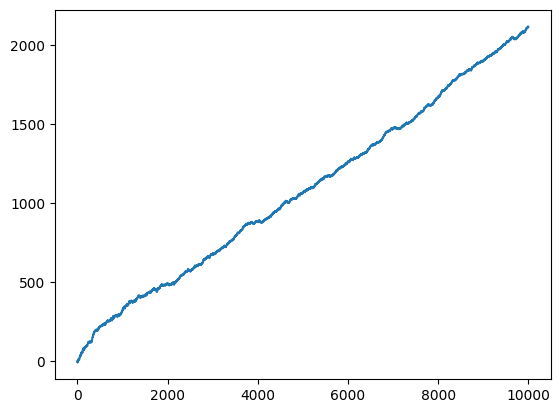

In [6]:
plt.plot(b1_regrets)
plt.show()